# ADS Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

-- Input some description here --

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


## 2) Exploratory Data Analysis

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


In [8]:
df_data.describe()

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
count,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.00000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,9.213726e+07,2.152700e+07,3.573513e+05,1381.216629,103992.366783,0.468355,3.479465e+20,2.968093e+10,5666.337333,11803.14200,15.364400,23750.603146,5.864147e+06,1.993741e+10,617.044667,4125.926667,204.687733
std,1.072118e+07,2.498827e+07,3.256708e+05,1298.972394,102427.282277,0.372758,4.951416e+20,4.294052e+10,720.416553,9993.41593,2.797517,6437.954850,2.149345e+06,1.830498e+10,370.151816,3947.399550,250.083641
min,7.204931e+07,9.205000e+03,0.000000e+00,0.121000,11.529700,0.000000,0.000000e+00,0.000000e+00,2829.000000,575.00000,4.460000,12869.625000,0.000000e+00,0.000000e+00,126.000000,211.400000,0.000000
25%,8.278264e+07,5.229082e+05,4.175475e+04,59.658250,4471.975825,0.056725,3.404057e+19,1.497751e+10,5234.250000,1523.00000,13.950000,20230.968750,4.009369e+06,1.351073e+09,376.000000,610.250000,10.950000
50%,9.407962e+07,5.975766e+06,3.061815e+05,1444.464500,92156.117400,0.569950,2.910479e+20,2.251696e+10,5946.000000,13026.50000,14.340000,21226.718750,6.715085e+06,1.554304e+10,462.500000,3418.500000,136.045000
75%,1.016003e+08,4.406175e+07,6.285058e+05,2505.067250,179726.672575,0.831900,4.513010e+20,2.688101e+10,6080.000000,20983.25000,16.370000,30987.929688,7.997891e+06,3.956602e+10,774.000000,6721.075000,295.085000
max,1.076359e+08,7.469110e+07,1.349890e+06,3606.036000,295911.997400,0.969000,5.862526e+21,9.395883e+11,6912.000000,36630.00000,30.310000,39316.093750,8.004217e+06,4.936428e+10,2096.000000,19345.500000,1385.020000


In [9]:
# Correlations
df_corr = df_data.corr()
df_corr

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
Supply,1.000000,0.871879,0.843540,0.840346,0.823709,0.905329,0.474226,-0.337491,0.288837,0.870169,-0.187655,-0.792496,0.887071,0.902041,0.332875,0.733790,0.511601
AddressCount,0.871879,1.000000,0.789259,0.766725,0.782175,0.811562,0.380650,-0.233489,0.362446,0.804732,-0.288567,-0.857087,0.813752,0.891032,0.243759,0.651342,0.334379
TxGrowth,0.843540,0.789259,1.000000,0.851423,0.875319,0.936036,0.647129,-0.214922,0.245369,0.965090,-0.197697,-0.808046,0.888451,0.959463,0.634506,0.923400,0.797612
Difficulty,0.840346,0.766725,0.851423,1.000000,0.974904,0.928816,0.539480,-0.234873,0.041182,0.915648,0.019681,-0.788789,0.898953,0.904746,0.557167,0.751845,0.680616
NetworkHash,0.823709,0.782175,0.875319,0.974904,1.000000,0.902719,0.550765,-0.232651,0.214247,0.901368,-0.173559,-0.740443,0.885202,0.928528,0.654439,0.782741,0.702010
NetworkUtilization,0.905329,0.811562,0.936036,0.928816,0.902719,1.000000,0.627518,-0.236102,0.088811,0.975272,-0.017440,-0.859511,0.906912,0.961191,0.535564,0.845872,0.710283
TransactionFee,0.474226,0.380650,0.647129,0.539480,0.550765,0.627518,1.000000,0.076165,0.034146,0.634351,-0.034050,-0.442397,0.542742,0.603379,0.582100,0.645400,0.659227
AvgGasPrice,-0.337491,-0.233489,-0.214922,-0.234873,-0.232651,-0.236102,0.076165,1.000000,-0.193311,-0.220846,0.141051,0.152590,-0.283996,-0.238085,-0.074185,-0.179950,-0.109099
BlockCountReward,0.288837,0.362446,0.245369,0.041182,0.214247,0.088811,0.034146,-0.193311,1.000000,0.110668,-0.966166,0.038047,0.174196,0.292405,0.265952,0.238820,0.018776
BlockSize,0.870169,0.804732,0.965090,0.915648,0.901368,0.975272,0.634351,-0.220846,0.110668,1.000000,-0.046829,-0.854043,0.912690,0.961338,0.573232,0.879677,0.749189


### Data Visualization

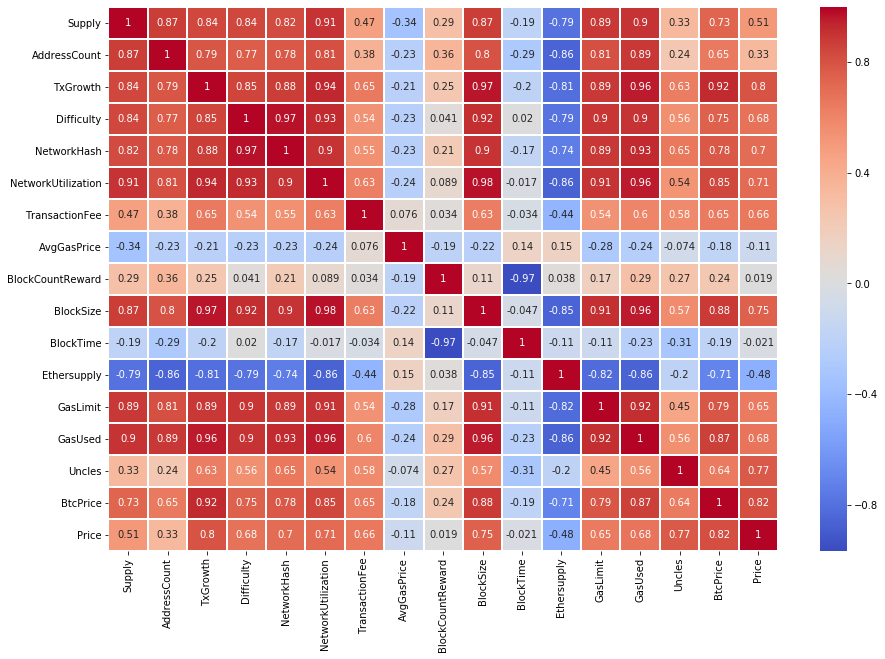

In [10]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

In [11]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values[:-1], 4)

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


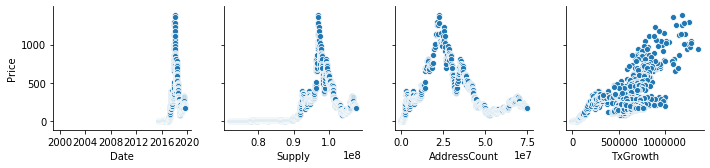

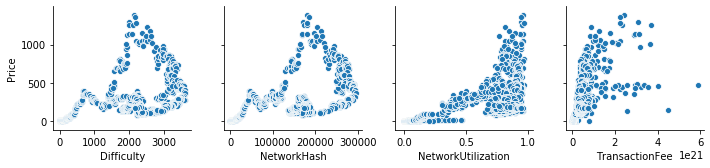

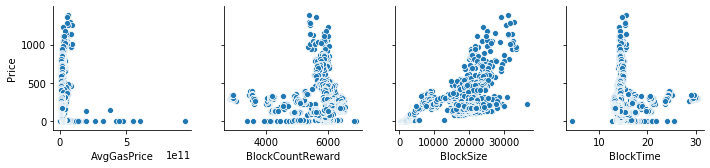

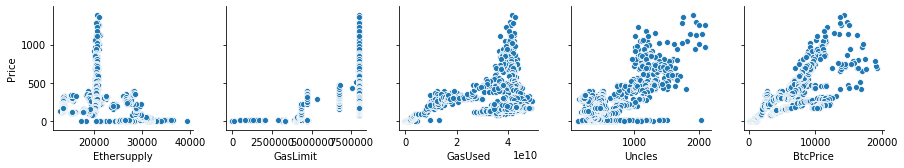

In [12]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

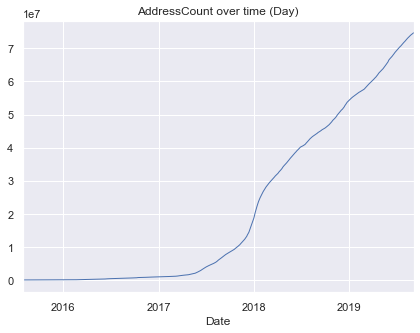

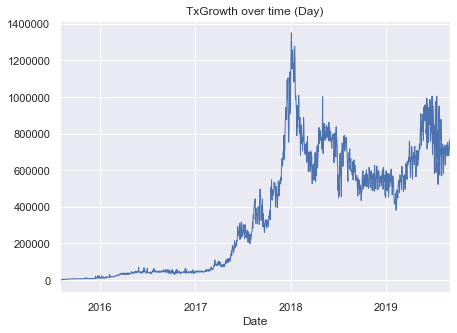

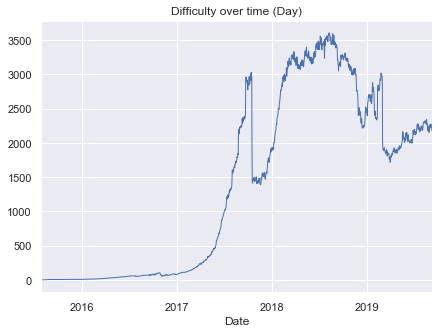

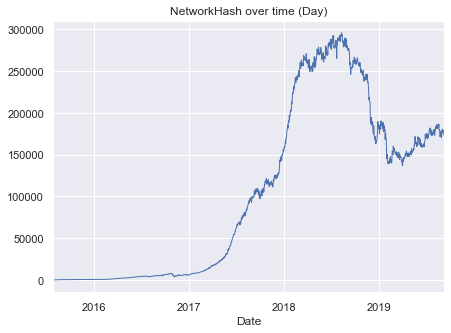

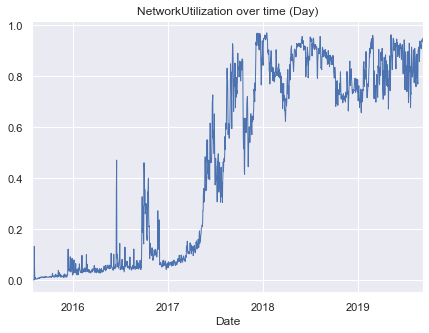

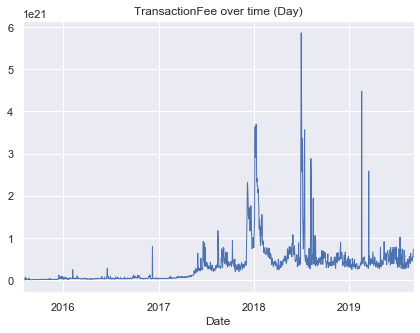

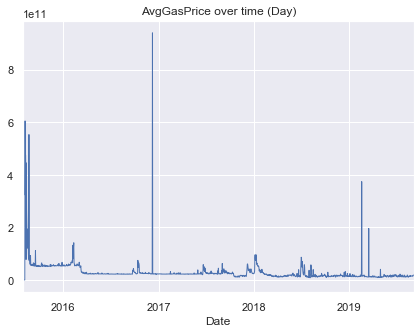

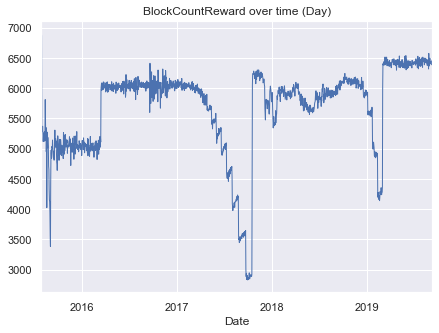

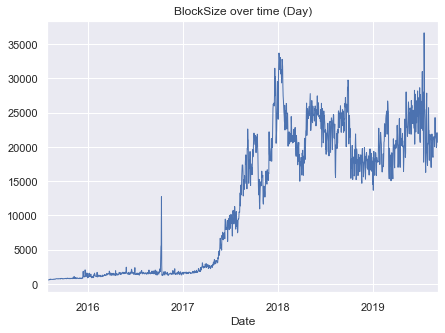

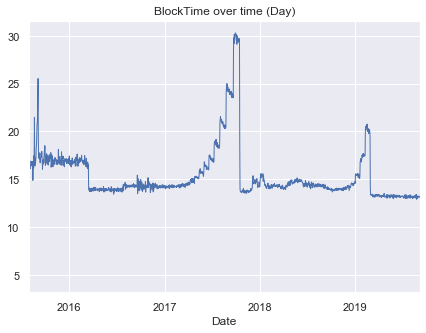

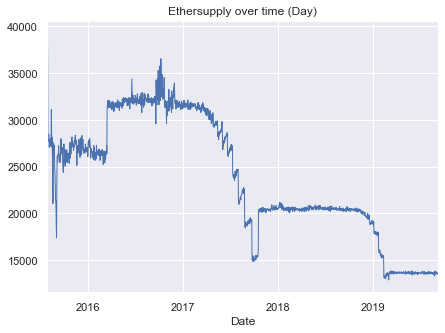

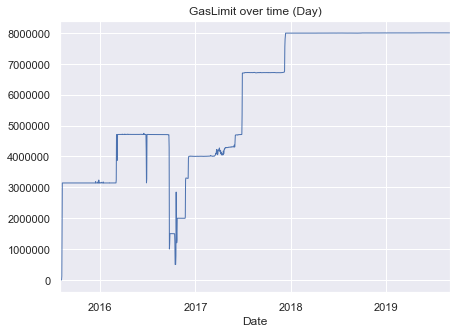

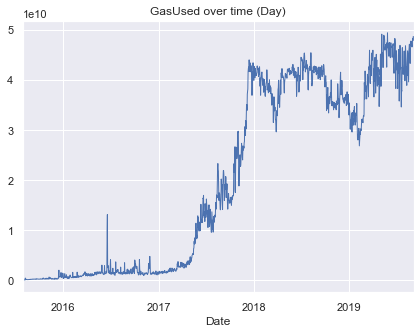

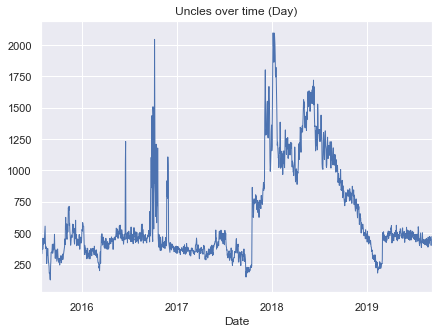

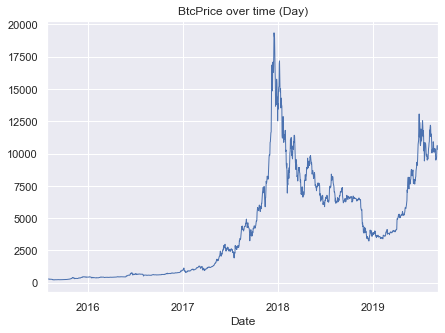

In [13]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(7, 5)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

### Seasonality Plot

Text(0.5, 1.0, 'Monthly Seasonality')

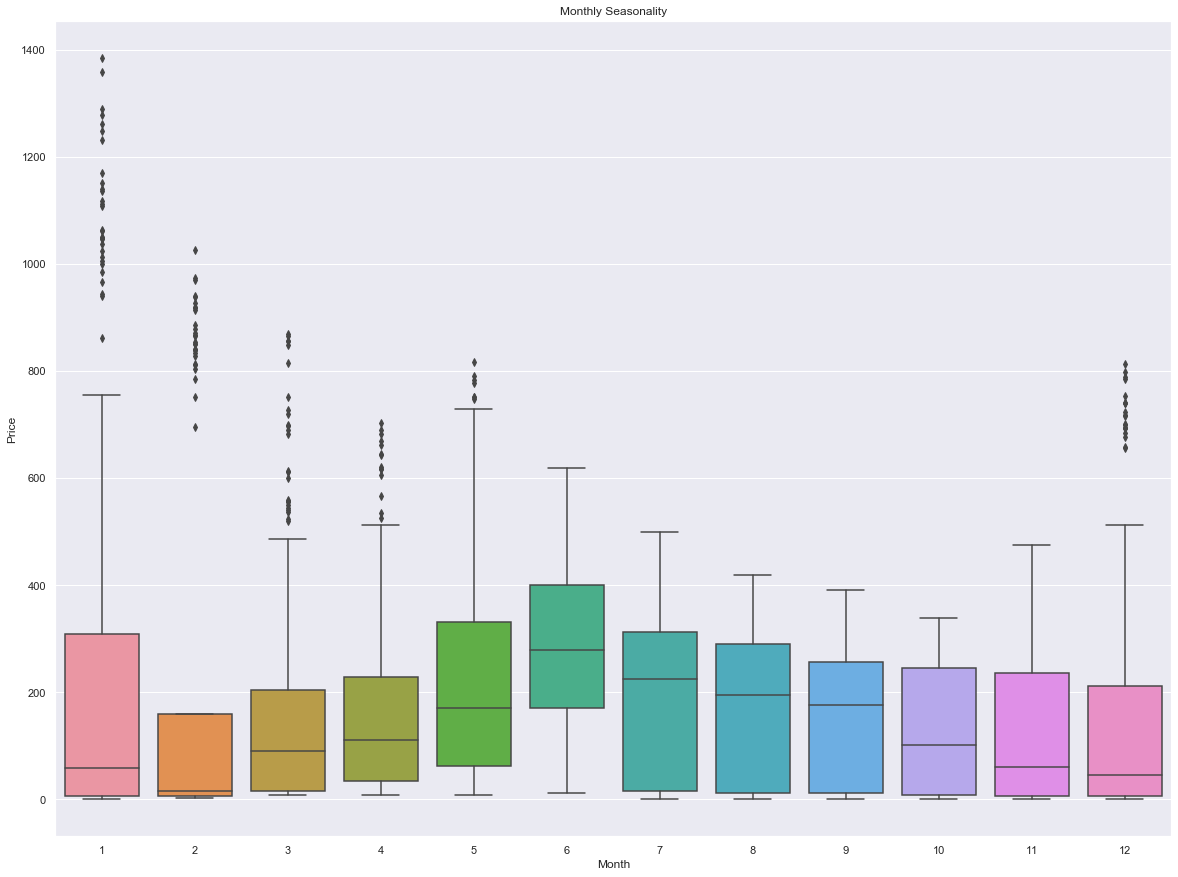

In [14]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Monthly Seasonality")

Text(0.5, 1.0, 'Weekly Seasonality')

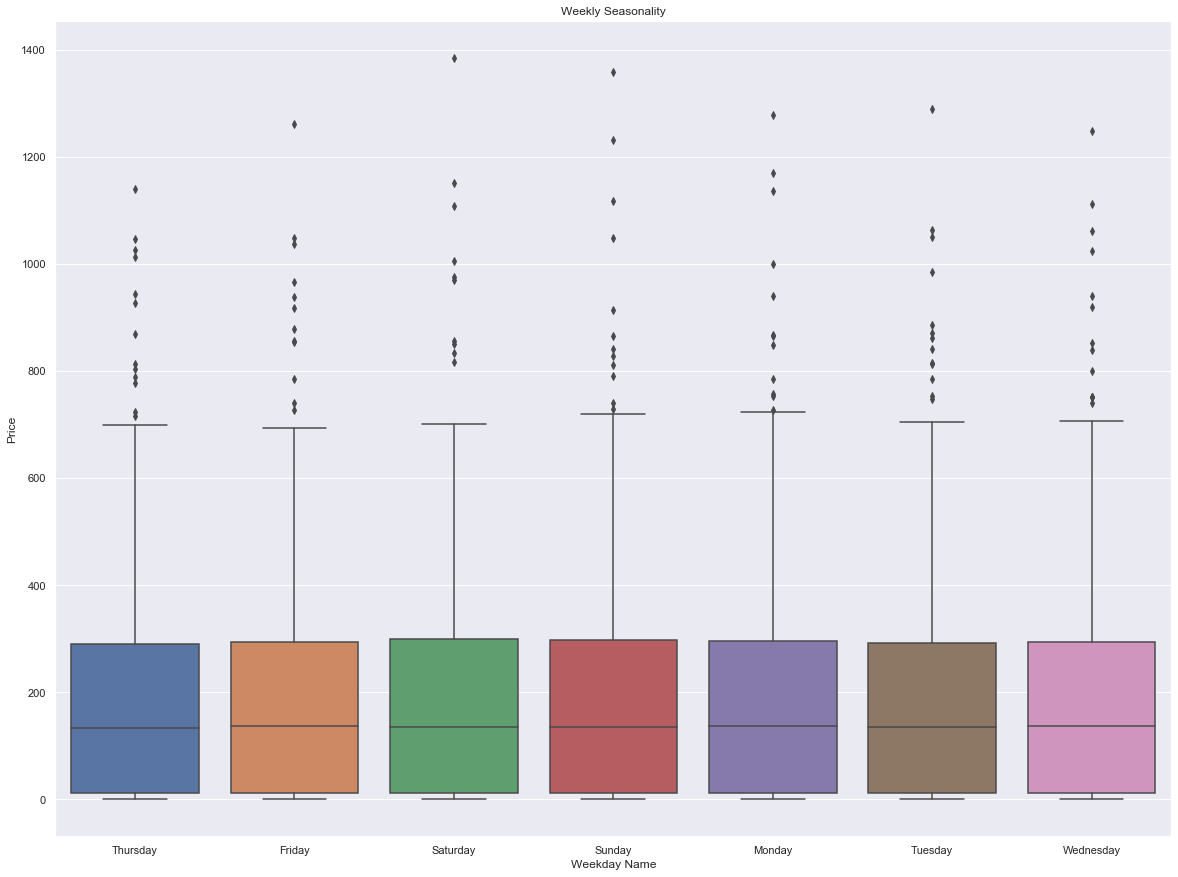

In [15]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Weekly Seasonality")

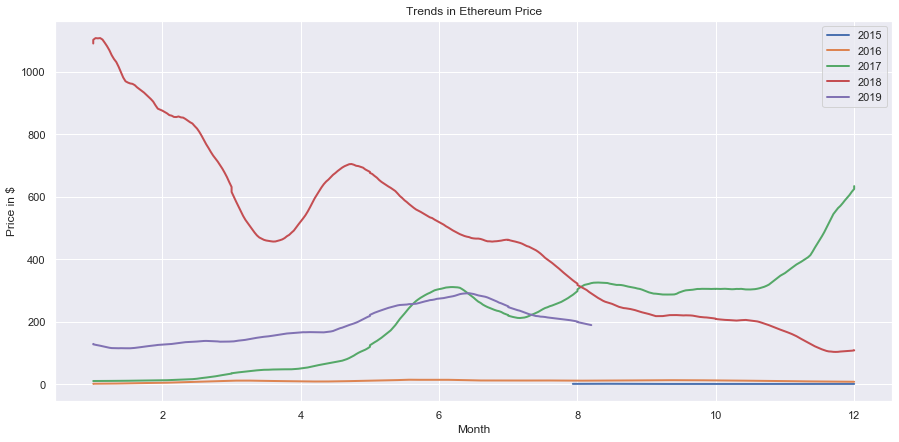

In [16]:
years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(30, center=True).mean()
    
fig, ax = plt.subplots(figsize=(15, 7))
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

From the plots below, we could see that there's no seasonality in Etherium Price. Neither by monthly nor weekly

### Trend Plot

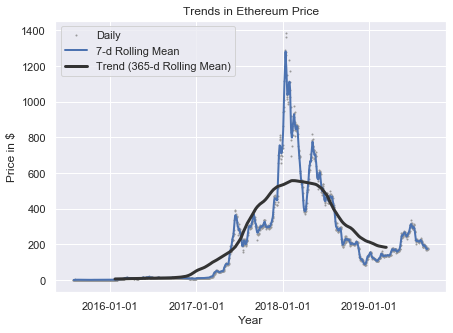

In [17]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price']

def plot_trend(column, data):
    df_time_365d = data[[column]].rolling(window=365, center=True, min_periods=360).mean()
    df_time_7d = data[[column]].rolling(7, center=True).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots()
    ax.plot(data[column], marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
    ax.plot(df_time_365d[column], color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    # Set x-ticks to yearly interval and add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in $')
    ax.set_title('Trends in Ethereum Price');

plot_trend("Price",df_time )

## 3) Feature Engineering

In [18]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object


In [19]:
#set Y variable
etherPrice = df_data[['Date','Price']].set_index('Date')


### Normalization

In [20]:
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features


### Feature for TS model

In [21]:

x_var = df_data.iloc[:,1:-1] 
normalised_TS_features = normalise_var(x_var)
#make into timeseries
normalised_TS_features["Date"] = df_data["Date"]
normalised_TS_features = normalised_TS_features.set_index('Date')


### Feature with suprevised learning

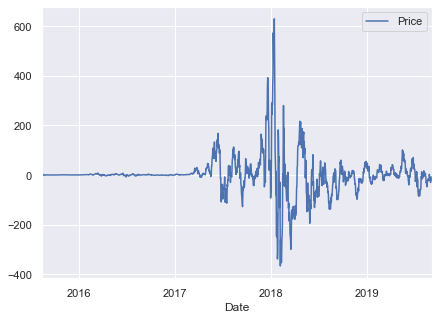

In [22]:
#Make Stationary
differenced = etherPrice.diff(12)
differenced = differenced[12:]
# Seasonality Adjusted
differenced.plot()
plt.show()

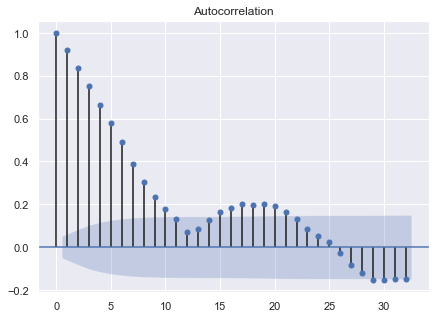

In [23]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
plt.show()

In [24]:
# reframe as supervised learning
lag_var = pd.DataFrame()
for i in range(12,0,-1):
    lag_var['t-'+str(i)] = differenced["Price"].shift(i).values
lag_var['t'] = differenced["Price"].values
display(lag_var.head(13))
lag_var = lag_var[13:]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37
6,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20
7,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27
8,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51
9,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51,0.67


In [25]:
normalise_Lag_features = normalise_var(lag_var)

In [26]:
normalise_Lag_features.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.369606,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340
1,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737
2,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707
3,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687
4,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687,0.368280


### Feature Importance plots and selection

1) Random Forest Regression. We can use feature importance to help to estimate the relative importance of contrived input features for time series forecasting.
2) A popular method for feature selection is called Recursive Feature Selection (RFE). RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left. Smaller is better

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

def plot_featimp(X,y):
    # fit random forest model
    model = RandomForestRegressor(n_estimators=500, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = X.columns.values
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names, rotation='vertical')
    plt.title("Feature Importance")
    plt.show()
    

def select_feature(X,y):
    rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
    fit = rfe.fit(X, y)
    # report selected features
    print('Selected Features:')
    names = X.columns.values
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, fit.ranking_)
    plt.xticks(ticks, names, rotation="vertical")
    plt.show()

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.04764777 0.04812178 0.01529653 0.02647671 0.02928354 0.00541375
 0.00272383 0.00099691 0.00166554 0.00389165 0.00070278 0.00592179
 0.05668781 0.0105905  0.58459207 0.15998706]


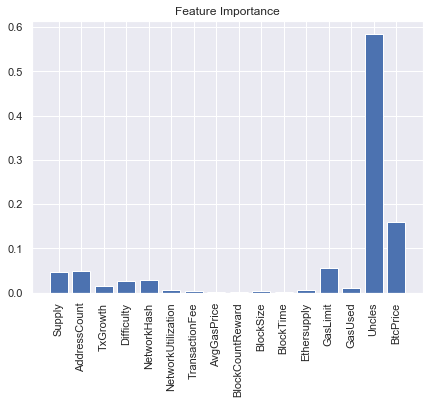

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features:
Supply
AddressCount
Uncles
BtcPrice


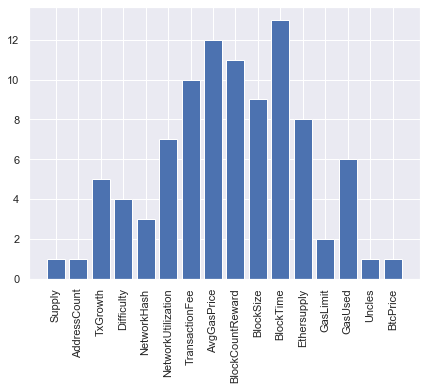

In [28]:
# with ts model
plot_featimp(normalised_TS_features,etherPrice)
select_feature(normalised_TS_features,etherPrice)

[0.01030228 0.01136461 0.00935514 0.00904723 0.0092302  0.01067421
 0.01025248 0.00759406 0.01003438 0.01490129 0.03940738 0.85783675]


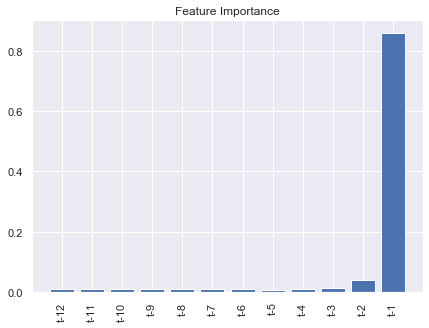

Selected Features:
t-11
t-7
t-2
t-1


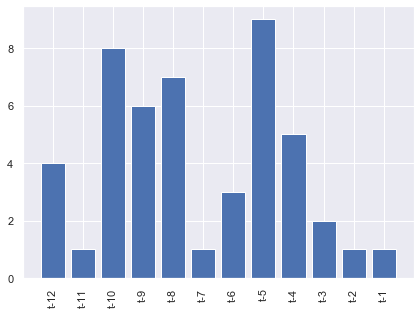

In [29]:
from sklearn.ensemble import RandomForestRegressor

X = normalise_Lag_features.iloc[:,0:-1]
y = normalise_Lag_features.iloc[:,-1]

# with supervised learning
plot_featimp(X,y)
select_feature(X,y)

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

In [30]:
df_selected_features = normalised_TS_features[['Supply','AddressCount','Uncles','BtcPrice']]
df_ads = pd.merge(df_selected_features, etherPrice, on='Date', how='outer')

df_ads.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 5 columns):
Supply          1500 non-null float64
AddressCount    1500 non-null float64
Uncles          1500 non-null float64
BtcPrice        1500 non-null float64
Price           1500 non-null float64
dtypes: float64(5)
memory usage: 70.3 KB


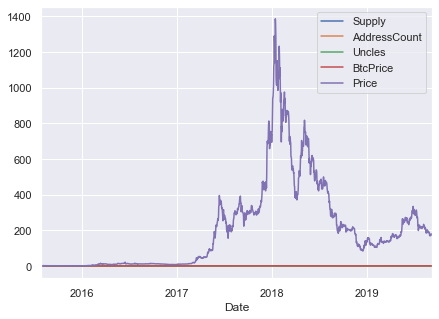

In [31]:
df_ads.plot()

====

# ARIMA

In [33]:
# ARIMA

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

evaluate_models(df_ads['Price'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=35327.990
ARIMA(0, 0, 1) MSE=10114.725
ARIMA(0, 1, 0) MSE=249.427
ARIMA(0, 1, 1) MSE=254.316
ARIMA(0, 1, 2) MSE=257.872
ARIMA(0, 2, 0) MSE=540.880
ARIMA(0, 2, 1) MSE=250.020
ARIMA(0, 2, 2) MSE=254.966
ARIMA(1, 0, 0) MSE=247.974
ARIMA(1, 0, 1) MSE=253.057
ARIMA(1, 0, 2) MSE=256.410
ARIMA(1, 1, 0) MSE=253.567
ARIMA(1, 1, 1) MSE=255.386
ARIMA(1, 1, 2) MSE=257.577
ARIMA(1, 2, 0) MSE=365.565
ARIMA(1, 2, 1) MSE=254.209
ARIMA(1, 2, 2) MSE=255.852
ARIMA(2, 0, 0) MSE=252.294
ARIMA(2, 0, 1) MSE=255.617
Best ARIMA(1, 0, 0) MSE=247.974


Test RMSE: 9.441


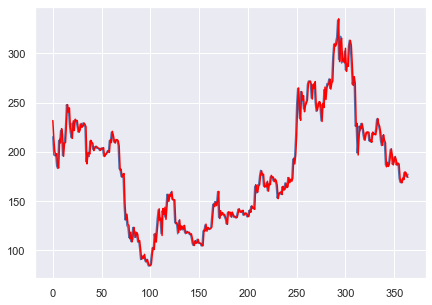

In [35]:
# Experimental Test-setup
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

# split into train (first 2 years) and test sets (last year)
X = df_ads['Price'].values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()

    # one step forecast
    yhat = model_fit.forecast()[0]
    
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

    # evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
# The “disp” Parameter

# split into train and test sets
X = df_ads['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=False)
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 16.137


In [37]:
# The “transparams” Parameter

# split into train and test sets
X = df_ads['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=False, transparams=False)
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 16.138


In [38]:
# The “trend” Parameter

# split into train and test sets
X = df_ads['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=False, trend='c')
    print(model_fit.params)
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

[ 0.50434235  0.09336345 -0.06278452  0.05362573 -0.09572453]
[ 0.53267769  0.0939435  -0.06307161  0.05715107 -0.09524631]
[ 0.51315739  0.09288598 -0.06339082  0.0573069  -0.0976574 ]
[ 0.50774543  0.09316117 -0.06374275  0.05727282 -0.09768765]
[ 0.52822718  0.0929284  -0.06475744  0.05858349 -0.09753637]
[ 0.57070238  0.09464227 -0.06537704  0.05656715 -0.09488   ]
[ 0.61582091  0.09819779 -0.06373817  0.05596045 -0.09693991]
[ 0.59884448  0.09660923 -0.06488577  0.05520803 -0.09656829]
[ 0.61871147  0.09598926 -0.0629922   0.05653732 -0.09569881]
[ 0.63976066  0.09672113 -0.06367239  0.05852735 -0.09424602]
[ 0.70308388  0.09889898 -0.06148235  0.05636769 -0.08800702]
[ 0.61091442  0.08833709 -0.06415501  0.05306718 -0.08515234]
[ 0.66447774  0.07876322 -0.05721065  0.05416743 -0.08293095]
[ 0.63670206  0.07593698 -0.05206828  0.05047154 -0.08348019]
[ 0.68729611  0.07309131 -0.04666174  0.04089873 -0.07652204]
[ 0.68098969  0.07253032 -0.04630446  0.04024435 -0.07537901]
[ 0.6666

[ 0.24763051  0.05873216 -0.02586896  0.02352368 -0.07611209]
[ 0.24404595  0.05875989 -0.02590303  0.02348614 -0.07603591]
[ 0.25614861  0.05868433 -0.02599768  0.02360625 -0.07592252]
[ 0.26215261  0.05884057 -0.02604329  0.02356183 -0.07586289]
[ 0.2556609   0.0587593  -0.02620863  0.0236105  -0.07581715]
[ 0.25150423  0.0588166  -0.02626314  0.02350603 -0.07578578]
[ 0.24996664  0.05883005 -0.02624208  0.0234854  -0.07582505]
[ 0.26230251  0.05876342 -0.02633848  0.02330983 -0.0756437 ]
[ 0.2606641   0.0587202  -0.02632795  0.02332205 -0.07562088]
[ 0.25526133  0.05873434 -0.0264697   0.02335623 -0.07557663]
[ 0.2516742   0.05877563 -0.02646175  0.02326187 -0.075553  ]
[ 0.2031146   0.05914407 -0.02592091  0.02336564 -0.07681387]
[ 0.20693672  0.05872065 -0.02592363  0.02331051 -0.07680825]
[ 0.19266879  0.05860036 -0.02433969  0.02331823 -0.07660135]
[ 0.17823561  0.05904228 -0.02448217  0.02491838 -0.07659016]
[ 0.17422142  0.05916982 -0.02436719  0.02488161 -0.07614904]
[ 0.1751

[ 0.12359895  0.05666455 -0.02271591  0.02474569 -0.07738004]
[ 0.12643153  0.05666026 -0.02267308  0.02469551 -0.07729453]
[ 0.12057294  0.05662881 -0.02266596  0.0246103  -0.07720057]
[ 0.1204311   0.05663111 -0.02266679  0.02461025 -0.07720264]
[ 0.12029626  0.05663137 -0.02266472  0.02460968 -0.077203  ]
[ 0.10233901  0.05663807 -0.0226385   0.02486317 -0.07730103]
[ 0.10228339  0.05664043 -0.0226386   0.02486377 -0.07730062]
[ 0.10074628  0.05663887 -0.02256235  0.0248596  -0.07729586]
[ 0.09394613  0.05666606 -0.02256934  0.02519396 -0.07731357]
[ 0.10312923  0.05649518 -0.0225957   0.025199   -0.07776036]
[ 0.09567376  0.05628072 -0.0224366   0.02520846 -0.07774016]
[ 0.09775652  0.05623884 -0.02237485  0.02516282 -0.07774242]
[ 0.09711489  0.05623515 -0.02236131  0.02514319 -0.07772832]
[ 0.09557646  0.05623564 -0.02236973  0.0251744  -0.07777277]
[ 0.09839729  0.05621702 -0.02236724  0.02518766 -0.07782484]
[ 0.09320574  0.05616926 -0.02232908  0.02518019 -0.07784288]
[ 0.0922

[ 0.1879583   0.05581489 -0.02322412  0.0255423  -0.07586987]
[ 0.18159027  0.05542475 -0.02306107  0.02582851 -0.07610353]
[ 0.18337235  0.05538231 -0.02294741  0.02578025 -0.07618003]
[ 0.17382829  0.05529541 -0.02270895  0.02516632 -0.07589984]
[ 0.17729307  0.05519508 -0.02267428  0.02507989 -0.07568052]
[ 0.17921395  0.05520755 -0.02272765  0.02509671 -0.07572198]
[ 0.18065456  0.05521885 -0.02271951  0.02505747 -0.07571145]
[ 0.19163258  0.05526395 -0.02263362  0.02511911 -0.07600831]
[ 0.19344731  0.05533247 -0.0226308   0.02513567 -0.07600262]
[ 0.1933412   0.05533197 -0.02263459  0.02513569 -0.07600353]
[ 0.19176468  0.05533356 -0.02264362  0.025077   -0.07600691]
[ 0.18193396  0.05538576 -0.02263694  0.0250205  -0.07638083]
[ 0.19162842  0.05504205 -0.02266202  0.02499867 -0.07629798]
[ 0.18887933  0.05495523 -0.02256038  0.02500438 -0.07629151]
[ 0.19244395  0.05492358 -0.02244687  0.02487276 -0.07629897]
[ 0.17725978  0.05474239 -0.02230105  0.02438574 -0.0757319 ]
[ 0.1727

Solver=lbfgs, Test RMSE: 16.137
Solver=bfgs, Test RMSE: 16.137
Solver=newton, Test RMSE: 16.137
Solver=nm, Test RMSE: 16.137
Solver=cg, Test RMSE: 16.137
Solver=ncg, Test RMSE: 16.137
Solver=powell, Test RMSE: 16.137


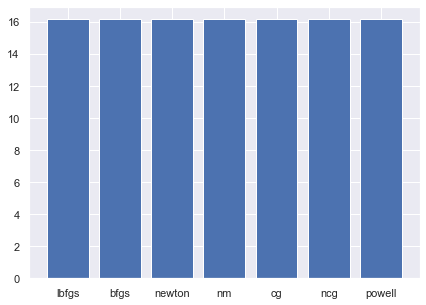

In [47]:
# The “solver” Parameter

# split into train and test sets
X = df_ads['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
for solver in solvers:
    history = [x for x in train]
    predictions = list()
    
    # walk-forward validation
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=False, solver=solver)
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    scores.append(rmse)
    print('Solver=%s, Test RMSE: %.3f' % (solver, rmse))

# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()

=-=-=-=-=-=-=-=-

# FB Prophet

In [52]:
# fbprophet

from fbprophet import Prophet

df_prophet1 = df_ads
df_prophet1['Date'] = df_ads.index

df_prophet2 = df_ads.rename(columns={"Date": "ds"})
df_prophet = df_prophet2.rename(columns={"Price": "y"})

my_model = Prophet(interval_width=0.95)
my_model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1531,2022-05-01
1532,2022-06-01
1533,2022-07-01
1534,2022-08-01
1535,2022-09-01


In [54]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1531,2022-05-01,430.066211,-3368.179711,4761.574611
1532,2022-06-01,469.269645,-3555.507307,4998.648378
1533,2022-07-01,475.936528,-3661.125090,5190.024688
1534,2022-08-01,447.303509,-3858.681716,5472.532483
1535,2022-09-01,438.566722,-4020.678909,5623.099449


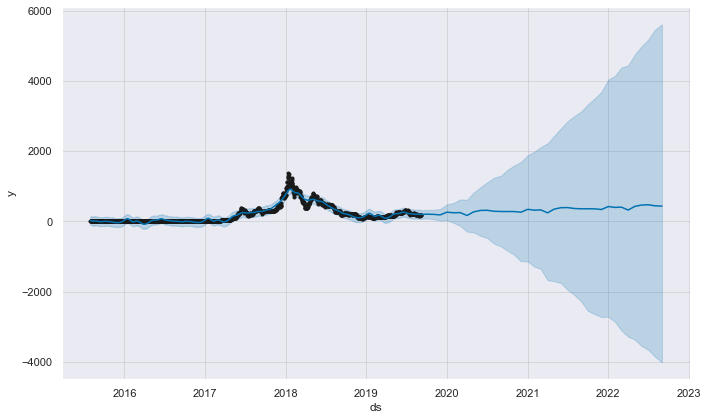

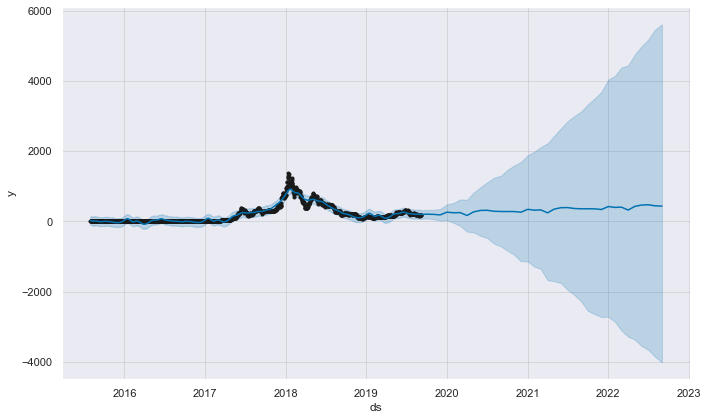

In [55]:
my_model.plot(forecast,uncertainty=True)

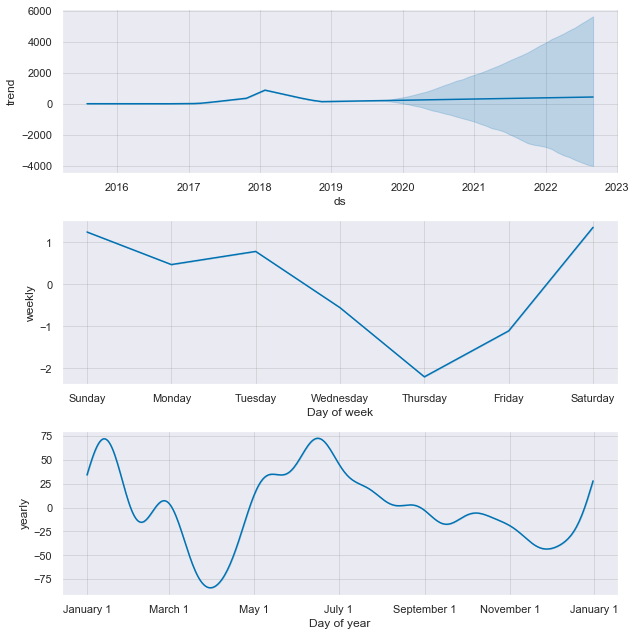

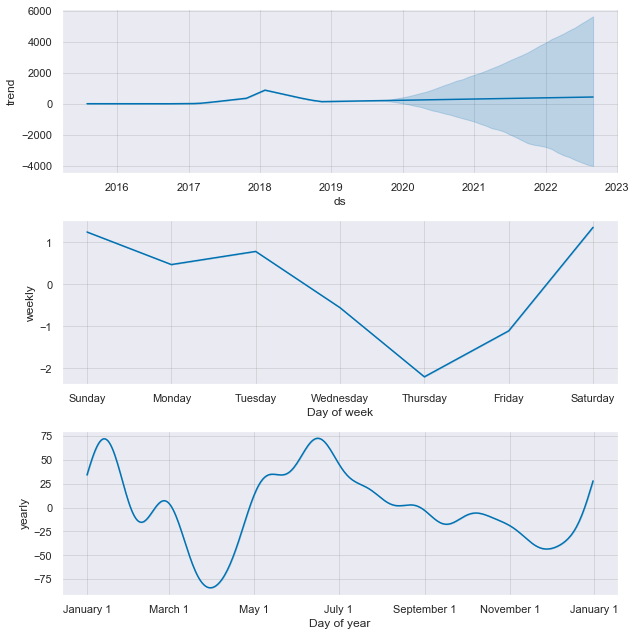

In [56]:
my_model.plot_components(forecast)

=-=-=-=-=-=-=-=-

# LSTM

In [65]:
# LSTM
df_lstm = df_ads.set_index('Date').copy()


# split data
split_date = '2018-06-25'
data_train = df_lstm.loc[df_lstm.index <= split_date].copy()
data_test = df_lstm.loc[df_lstm.index > split_date].copy()

In [68]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 5))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 5, 1))

In [69]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(5,1)))
model.add(Dropout(0.2))
model.add(Dense(5))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Using TensorFlow backend.



Epoch 1/100
 - 1s - loss: 0.1195
Epoch 2/100
 - 0s - loss: 0.0927
Epoch 3/100
 - 0s - loss: 0.0846
Epoch 4/100
 - 0s - loss: 0.0773
Epoch 5/100
 - 0s - loss: 0.0733
Epoch 6/100
 - 0s - loss: 0.0716
Epoch 7/100
 - 0s - loss: 0.0663
Epoch 8/100
 - 0s - loss: 0.0635
Epoch 9/100
 - 0s - loss: 0.0583
Epoch 10/100
 - 0s - loss: 0.0583
Epoch 11/100
 - 0s - loss: 0.0508
Epoch 12/100
 - 0s - loss: 0.0481
Epoch 13/100
 - 0s - loss: 0.0416
Epoch 14/100
 - 0s - loss: 0.0367
Epoch 15/100
 - 0s - loss: 0.0328
Epoch 16/100
 - 0s - loss: 0.0281
Epoch 17/100
 - 0s - loss: 0.0272
Epoch 18/100
 - 0s - loss: 0.0262
Epoch 19/100
 - 0s - loss: 0.0248
Epoch 20/100
 - 0s - loss: 0.0239
Epoch 21/100
 - 0s - loss: 0.0237
Epoch 22/100
 - 0s - loss: 0.0216
Epoch 23/100
 - 0s - loss: 0.0213
Epoch 24/100
 - 0s - loss: 0.0206
Epoch 25/100
 - 0s - loss: 0.0199
Epoch 26/100
 - 0s - loss: 0.0204
Epoch 27/100
 - 0s - loss: 0.0192
Epoch 28/100
 - 0s - loss: 0.0188
Epoch 29/100
 - 0s - loss: 0.0189
Epoch 30/100
 - 0s - lo

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 67,205
Trainable params: 67,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 5))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 5, 1))
predicted_ETH_price = model.predict(inputs)
predicted_ETH_price = sc.inverse_transform(predicted_ETH_price)

In [ ]:
data_test['Weighted_Price_Prediction'] = predicted_ETH_price
data_all = pd.concat([data_test, data_train], sort=False)

In [ ]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Price': 'lstm'})
final_data = final_data[['Date','Price','lstm']]
final_data.head()

In [ ]:
mean_absolute_error(y_true=data_test['Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

=-=-=-=-=-=-=-=-

# Holt Winter’s Exponential Smoothing (HWES) 

In [ ]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat_HWES = model_fit.predict(len(data), len(data))
print(yhat_HWES)


forecast_HWES = my_model.predict(future_dates)
forecast_HWES['yhat'].tail()
my_model.plot(forecast_HWES,uncertainty=True)

=-=-=-=-=-=-=-=-  =-=-=-=-=-=-=-=-  =-=-=-=-=-=-=-=-  =-=-=-=-=-=-=-=-   =-=-=-=-=-=-=-=-

In [ ]:
# cross validation
df_cross = df_ads.set_index('Date').copy()

from sklearn import preprocessing
X=df_cross.drop('Price',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=df_cross['Price']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

In [ ]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])

In [ ]:
#Apply our model and get our prediction
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [ ]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=df_cross.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df_cross=df_cross.append(df1)
df_cross['Forecast'].tail()

In [ ]:
#Now we'll plot our forecast! 
pd.plotting.register_matplotlib_converters() #prophet: https://darektidwell.com/typeerror-float-argument-must-be-a-string-or-a-number-not-period-facebook-prophet-and-pandas/
df_cross['Price'].plot(figsize=(12,6),label='Price')
df_cross['Forecast'].plot(label='forecast')
plt.legend()

=-=-=-=-=-=-=-=-

### Data Split train and test

### Fit the model and predict

## 5) Evaluation
### Some evaluation methods

### Evaluation plots and data comparison

### Conclusion